In [77]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold



# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from lightgbm import LGBMRegressor

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

# Zero regression
from sklego.meta import ZeroInflatedRegressor


# Metrics for regression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score

# Metrics for classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report,matthews_corrcoef

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PowerTransformer

#  balenced regression
from imblearn.ensemble import BalancedBaggingClassifier

## Data preprocessing

In [78]:
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

In [79]:
X_train = pd.DataFrame(X_train, columns=col_names)

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
y_train = pd.DataFrame(y_train, columns=['target'])

,target
0,0.654947
1,0.649995
2,0.154947
3,0.616176
4,0.359725
...,...
7332,0.000000
7333,0.002193
7334,0.293481
7335,0.596804


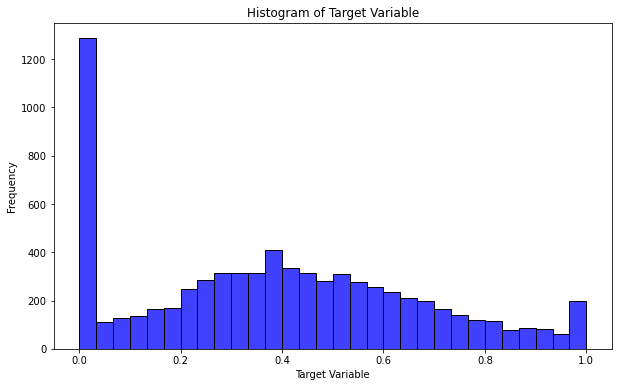

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train.values.flatten(), bins=30, kde=False, color='blue')
plt.title('Histogram of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

In [82]:
y_train.value_counts()

target  
0.000000    1207
1.000000     168
0.349999      56
0.374999      51
0.324999      47
            ... 
0.282986       1
0.282692       1
0.282500       1
0.282399       1
0.363435       1
Length: 2476, dtype: int64

As seen in the histogram, and now confirmed with value counts, y = 0.0 occurs much more frequently than other values - the target variable is imbalanced, which may pose a problem later on if not dealt with wisely.

In [83]:
X_train.columns[X_train.isnull().any()]

Index([], dtype='object')

No columns with missing values.

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Columns: 2132 entries, D00 to FP2088
dtypes: float64(2132)
memory usage: 119.3 MB


Columns consist of type 'float64' only. Let's further inspect this.

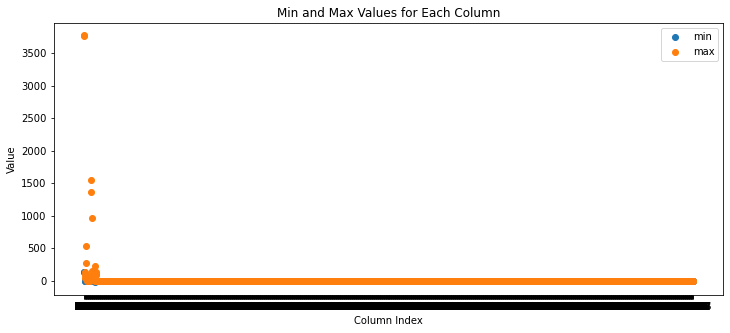

In [85]:
plt.figure(figsize=(12, 5))
plt.plot(X_train.min(axis=0), 'o', label="min") 
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.title('Min and Max Values for Each Column')
plt.legend(loc="best")
plt.xlabel("Column Index")
plt.ylabel("Value")
plt.show()

While some columns are indeed floats, the majority seem to be binary and not floats as originally encoded.

In [86]:
binary_filter = X_train.apply(lambda col: set(col) == {0, 1}) #columns containing only 0s and 1s
binary_columns = X_train.columns[binary_filter].tolist()
X_train[binary_columns] = X_train[binary_columns].astype('category')

binary_df = X_train[binary_columns]
binary_df.shape

(7337, 2090)

Training set consisting of binary columns only, all of type 'category'. 2090 samples.

In [87]:
float_filter = ~X_train.columns.isin(binary_columns) #remaining columns (not in binary_columns)
float_columns = X_train.columns[float_filter].tolist()

float_df = X_train[float_columns]
float_df.shape

(7337, 42)

Training set consisting of all remaining columns of type 'float64'. 42 samples.

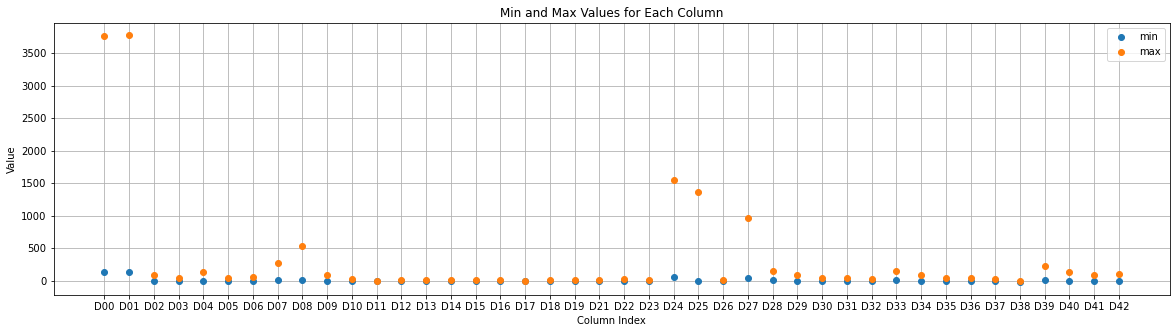

In [88]:
plt.figure(figsize=(20, 5))
plt.plot(float_df.min(axis=0), 'o', label="min") 
plt.plot(float_df.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.grid()
plt.title("Min and Max Values for Each Column")
plt.xlabel("Column Index")
plt.ylabel("Value")
plt.show()

As there seems to be an overlap of min and max values for some columns, let's double check everything is correct with these columns.

In [89]:
results = []
for col in float_df:
    min_val = float_df[col].min()
    max_val = float_df[col].max()
    results.append((col, min_val, max_val))

check = pd.DataFrame(results, columns=['column', 'min', 'max'])
check

,column,min,max
0,D00,135.068414,3768.848446
1,D01,135.166000,3771.262000
2,D02,1.000000,92.000000
3,D03,0.000000,47.000000
4,D04,0.000000,137.000000
5,D05,0.000000,42.000000
6,D06,0.000000,58.000000
7,D07,10.000000,266.000000
8,D08,19.000000,527.000000
9,D09,1.000000,93.000000


In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Columns: 2132 entries, D00 to FP2088
dtypes: category(2090), float64(42)
memory usage: 17.2 MB


2090 columns of type 'category' and 42 of type 'float64', as intended.

# Methodology 

Due to the way the daset is structured, we will be using a two-step approach to the problem. First, we will use the 2090 columns of type 'category' to train a model, and then use the 42 columns of type 'float64' to train a second model. Finally, we will combine the predictions of both models to obtain the final result.

- The categorical columns will be named "Binary"

- The float columns will be named "Float"


# Binary columns

# Float columns

# Stack